Load Config file

In [1]:
config_file = '/home/as2114/code/Flora_Mask/maskformer/configs/finetune_maskformer2.yml'

In [2]:
from utils import load_config
config = load_config(config_file)
config


{'data': {'batch_size': 2, 'pin_memory': True, 'num_workers': 1, 'save_dataset': False, 'shuffle_buffer': 10000, 'seed': 0, 'image_dir': '/mnt/gsdata/projects/panops/Labeled_data_seprated_in_Folder/image_all', 'mask_dir': '/mnt/gsdata/projects/panops/Labeled_data_seprated_in_Folder/image_mask_all'}, 'model': {'type': 'MaskFormer2'}, 'train': {'start_epoch': 0, 'epochs': 100, 'warmup_epochs': 20, 'weight_decay': 0.05, 'warmup_lr': 0.001, 'min_lr': 0.0001, 'clip_grad': 5.0, 'lr_scheduler': {'name': 'cosine', 'cycle_limit': 1, 'decay_epochs': 80}, 'optimizer': {'name': 'adamw', 'eps': 1e-08, 'betas': [0.9, 0.999], 'base_lr': 0.0005}}, 'evaluate': {'pre_eval': False, 'eval_only': False, 'eval_freq': 1, 'save_best': True}, 'checkpoint': {'auto_resume': True, 'resume': '', 'loadonlymodel': False, 'evaluate_checkpoint': False, 'freq': 1, 'max_kept': -1, 'save_freq': 10}, 'model_name': '', 'output': '???', 'wandb_output': '', 'tag': 'default', 'print_freq': 1, 'seed': 0, 'wandb': False, 'local

Build data loader from config file
Currently not building val test because of tif file 

In [3]:
from dataset import build_loader

train, train_loader,  = build_loader(config['data'])

/home/as2114/miniconda3/envs/mask2former/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/as2114/code/Flora_Mask/maskformer/dataset/builder.py:27: FutureWarning: `reduce_labels` is deprecated and will be removed in version 4.44.0 for `MaskFormerImageProcessor.__init__`. Use `do_reduce_labels` instead.
  return MaskFormerImageProcessor(ignore_index=0, reduce_labels=False, do_resize=False, do_rescale=False, do_normalize=False)


dataset len:  80012
successfully build train dataset


Test dataloader
MaskFormer2 takes binary masks so dataset should have image, masks, ori_image, ori_mask, binary_masks and class labels

In [4]:
import torch
batch = next(iter(train_loader))
for k,v in batch.items():
  if k in ['original_images', 'original_segmentation_maps']:
    continue
  if isinstance(v, torch.Tensor):
    print(k)
    print(k,v.shape)
  else:
    print(k)
    print(k,v[0].shape)

idx: 0 img name :Acer pseudoplatanus0000001.jpg mask_name :mask_Acer pseudoplatanus0000001.png
idx: 1 img name :Acer pseudoplatanus0000002.jpg mask_name :mask_Acer pseudoplatanus0000002.png
idx: 2 img name :Acer pseudoplatanus0000003.jpg mask_name :mask_Acer pseudoplatanus0000003.png
idx: 3 img name :Acer pseudoplatanus0000004.jpg mask_name :mask_Acer pseudoplatanus0000004.png


/home/as2114/miniconda3/envs/mask2former/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


pixel_values
pixel_values torch.Size([2, 3, 256, 256])
pixel_mask
pixel_mask torch.Size([2, 256, 256])
mask_labels
mask_labels torch.Size([10, 256, 256])
class_labels
class_labels torch.Size([10])
idx: 4 img name :Acer pseudoplatanus0000005.jpg mask_name :mask_Acer pseudoplatanus0000005.png


idx: 5 img name :Acer pseudoplatanus0000006.jpg mask_name :mask_Acer pseudoplatanus0000006.png
idx: 0 img name :Acer pseudoplatanus0000001.jpg mask_name :mask_Acer pseudoplatanus0000001.png
idx: 1 img name :Acer pseudoplatanus0000002.jpg mask_name :mask_Acer pseudoplatanus0000002.png
idx: 2 img name :Acer pseudoplatanus0000003.jpg mask_name :mask_Acer pseudoplatanus0000003.png
idx: 3 img name :Acer pseudoplatanus0000004.jpg mask_name :mask_Acer pseudoplatanus0000004.png
idx: 0 img name :Acer pseudoplatanus0000001.jpg mask_name :mask_Acer pseudoplatanus0000001.png
idx: 1 img name :Acer pseudoplatanus0000002.jpg mask_name :mask_Acer pseudoplatanus0000002.png
idx: 2 img name :Acer pseudoplatanus0000003.jpg mask_name :mask_Acer pseudoplatanus0000003.png
idx: 3 img name :Acer pseudoplatanus0000004.jpg mask_name :mask_Acer pseudoplatanus0000004.png
idx: 4 img name :Acer pseudoplatanus0000005.jpg mask_name :mask_Acer pseudoplatanus0000005.png

idx: 5 img name :Acer pseudoplatanus0000006.jpg m

In [5]:
train

In [6]:
example = train[0]
image = example[0]
image.shape

idx: 0 img name :Acer pseudoplatanus0000001.jpg mask_name :mask_Acer pseudoplatanus0000001.png


torch.Size([3, 256, 256])

In [7]:
mask = example[1]
mask.shape

torch.Size([256, 256])

In [8]:
id2label = {
"0": "Acer pseudoplatanus",
"1": "Aesculus hippocastanum",
"2": "Betula pendula",
"3": "Carpinus betulus",
"4": "Fagus sylvatica",
"5": "Fraxinus excelsior",
"6": "Prunus avium",
"7": "Quercus petraea",
"8": "Sorbus aucuparia",
"9": "Tilia platyphyllos",
"10": "background",
"11": "Grass"
}

In [9]:
id2label

{'0': 'Acer pseudoplatanus',
 '1': 'Aesculus hippocastanum',
 '2': 'Betula pendula',
 '3': 'Carpinus betulus',
 '4': 'Fagus sylvatica',
 '5': 'Fraxinus excelsior',
 '6': 'Prunus avium',
 '7': 'Quercus petraea',
 '8': 'Sorbus aucuparia',
 '9': 'Tilia platyphyllos',
 '10': 'background',
 '11': 'Grass'}

In [10]:
def color_palette():
    """Color palette that maps each class to RGB values.

    This one is actually taken from ADE20k.
    """
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

palette = color_palette()

In [11]:
#load any image and its corresponding map
img = '/mnt/gsdata/projects/panops/Labeled_data_seprated_in_Folder/image/Acer pseudoplatanus0002416.jpg'
mask_name = '/mnt/gsdata/projects/panops/Labeled_data_seprated_in_Folder/image_mask/mask_Acer pseudoplatanus0002416.png'


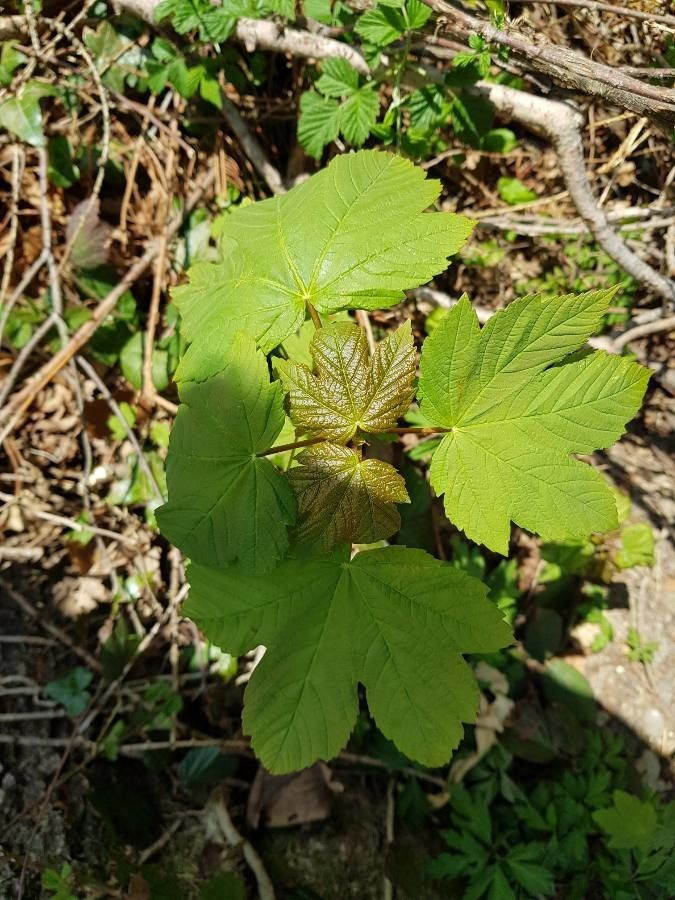

In [12]:
#open the image
from PIL import Image
import numpy as np

image = Image.open(img).convert('RGB')
image

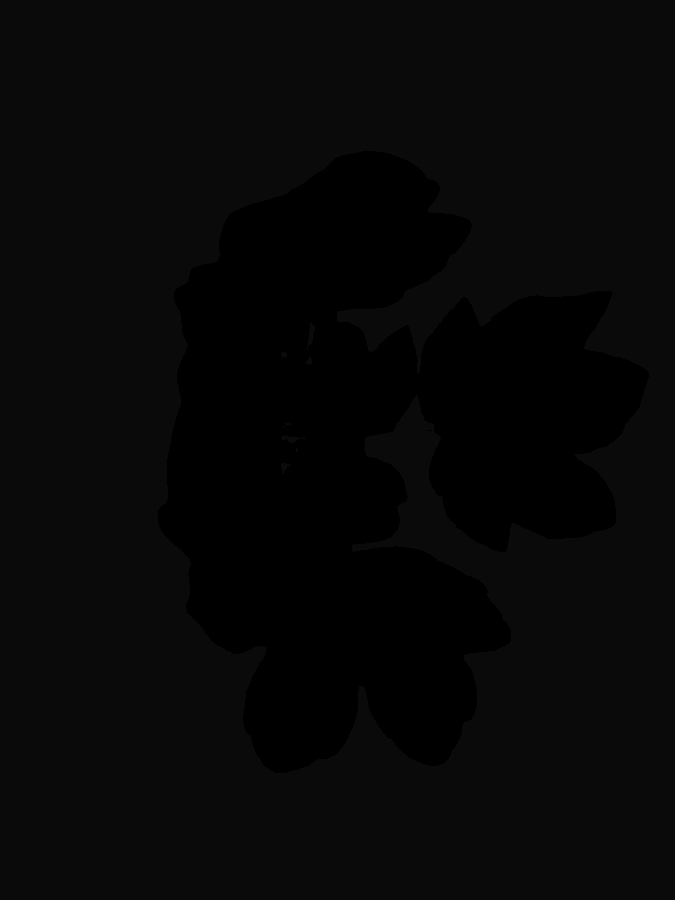

In [13]:
#open the mask
mask = Image.open(mask_name).convert('L')
mask

In [14]:
segmentation_map = np.array(mask)
segmentation_map

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)

In [15]:
np.unique(segmentation_map)

array([ 0, 10], dtype=uint8)

In [16]:
for idx in np.unique(segmentation_map):
    print(idx)
    print(id2label.get(str(idx)))
#labels = [id2label[idx] for idx in np.unique(segmentation_map)]


0
Acer pseudoplatanus
10
background


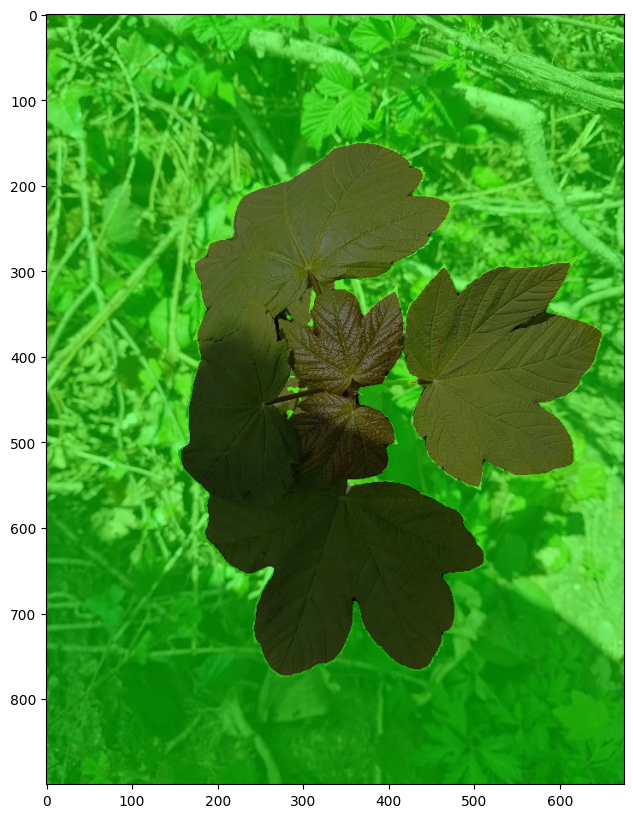

In [17]:
import numpy as np
import matplotlib.pyplot as plt

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map - 1 == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = np.array(image) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [18]:
from models import build_model

model = build_model(config['model'])
model

config {'type': 'MaskFormer2'}
Registery Registry(name=model, items={'MaskFormer2': <class 'models.maskformer2.MaskFormer2'>})


/home/as2114/miniconda3/envs/mask2former/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of MaskFormerForInstanceSegmentation were not initialized from the model checkpoint at facebook/maskformer-swin-base-ade and are newly initialized because the shapes did not match:
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([12, 256]) in the model instantiated
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([12]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([12]) in the model instantiated
You should pro

MaskFormer2(
  (model): MaskFormerForInstanceSegmentation(
    (model): MaskFormerModel(
      (pixel_level_module): MaskFormerPixelLevelModule(
        (encoder): MaskFormerSwinBackbone(
          (model): MaskFormerSwinModel(
            (embeddings): MaskFormerSwinEmbeddings(
              (patch_embeddings): MaskFormerSwinPatchEmbeddings(
                (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
              )
              (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (encoder): MaskFormerSwinEncoder(
              (layers): ModuleList(
                (0): MaskFormerSwinStage(
                  (blocks): ModuleList(
                    (0-1): 2 x MaskFormerSwinLayer(
                      (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
                      (attention): MaskFormerSwinAttention(
                        (self): MaskFormer

In [19]:
outputs = model(batch)

In [20]:
outputs.loss

tensor(3.5706, grad_fn=<AddBackward0>)

In [21]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

running_loss = 0.0
num_samples = 0
for epoch in range(100):
  print("Epoch:", epoch)
  model.train()
  for idx, batch in enumerate(tqdm(train_loader)):
      # Reset the parameter gradients
      optimizer.zero_grad()
      
      # Forward pass
      outputs = model(batch, device)

      # Backward propagation
      loss = outputs.loss
      loss.backward()

      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()
#For inference

#   model.eval()
#   for idx, batch in enumerate(tqdm(test_dataloader)):
#     if idx > 5:
#       break

#     pixel_values = batch["pixel_values"]
    
#     # Forward pass
#     with torch.no_grad():
#       outputs = model(pixel_values=pixel_values.to(device))

#     # get original images
#     original_images = batch["original_images"]
#     target_sizes = [(image.shape[0], image.shape[1]) for image in original_images]
#     # predict segmentation maps
#     predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs,
#                                                                                   target_sizes=target_sizes)

#     # get ground truth segmentation maps
#     ground_truth_segmentation_maps = batch["original_segmentation_maps"]

#     metric.add_batch(references=ground_truth_segmentation_maps, predictions=predicted_segmentation_maps)
  
#   # NOTE this metric outputs a dict that also includes the mIoU per category as keys
#   # so if you're interested, feel free to print them as well
#   print("Mean IoU:", metric.compute(num_labels = len(id2label), ignore_index = 0)['mean_iou'])

Epoch: 0


  0%|          | 0/40006 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'to'